In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [7]:
df.describe() #statistics

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.isna().sum() # there are no null values

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

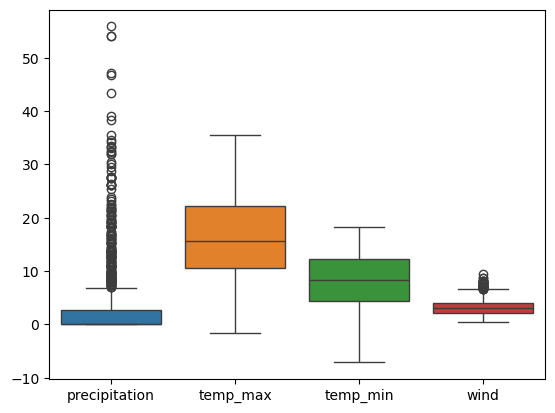

In [9]:
# Box plot to check outliers 
sns.boxplot(data = df)

# From the above boxplot it is seen that, precipitation has the highest number of outliers, followed by wind.

In [19]:
# Treating outliers
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outlier = df[(df['precipitation'] >= lower) & (df['precipitation'] <= upper)]
outlier

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [18]:
Q1 = df['wind'].quantile(0.25)
Q3 = df['wind'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outlier = df[(df['wind'] >= lower) & (df['wind'] <= upper)]
outlier

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [20]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

# Univariate Analysis

<Axes: xlabel='precipitation', ylabel='Count'>

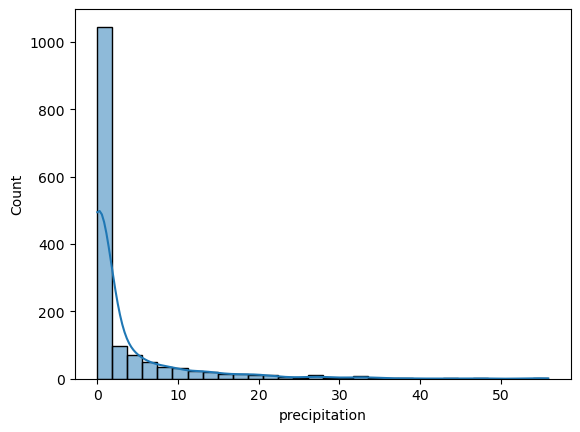

In [21]:
# Histplot of precipitation
sns.histplot(df['precipitation'], kde = True, bins = 30)

<Axes: xlabel='temp_max', ylabel='Count'>

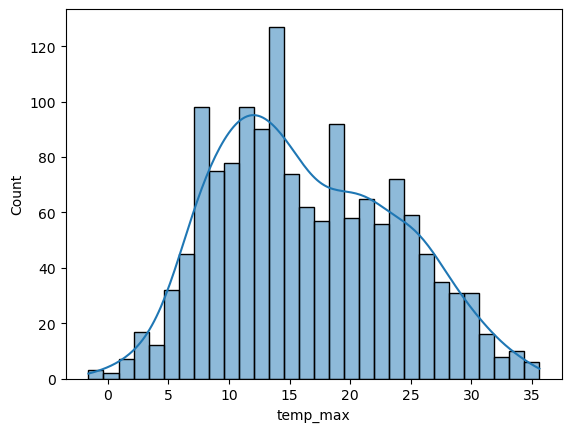

In [23]:
# Histplot of temperature
sns.histplot(df['temp_max'], kde = True, bins = 30)

<Axes: xlabel='temp_min', ylabel='Count'>

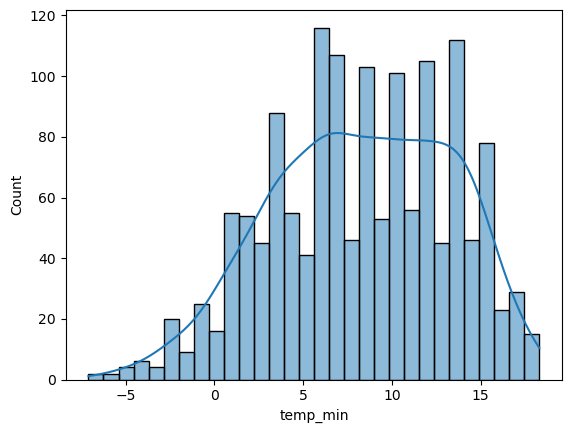

In [24]:
sns.histplot(df['temp_min'], kde = True, bins = 30)

<Axes: xlabel='count', ylabel='weather'>

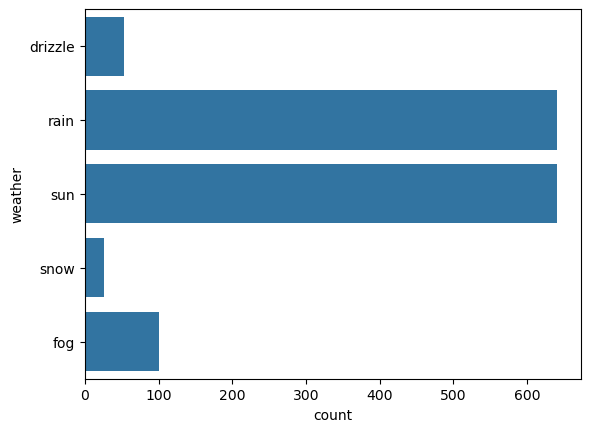

In [25]:
# Countplot of weather
sns.countplot(df['weather'])

# Bivariate Analysis

<Axes: xlabel='wind', ylabel='weather'>

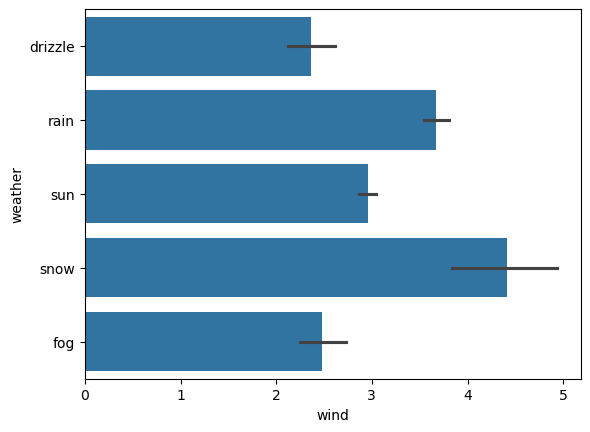

In [27]:
sns.barplot(x = 'wind', y = 'weather', data = df)

<Axes: xlabel='precipitation', ylabel='temp_max'>

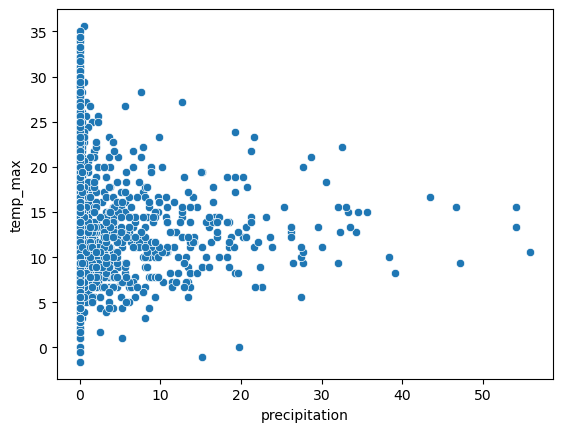

In [32]:
sns.scatterplot(y = 'temp_max', x = 'precipitation', data = df)

In [33]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [34]:
# One Hot Encoding
pd.get_dummies(df, columns = ['weather'], drop_first = True)

,date,precipitation,temp_max,temp_min,wind,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,False,True,False,False
1457,2015-12-28,1.5,5.0,1.7,1.3,False,True,False,False
1458,2015-12-29,0.0,7.2,0.6,2.6,True,False,False,False
1459,2015-12-30,0.0,5.6,-1.0,3.4,False,False,False,True


In [36]:
df[['precipitation', 'temp_max', 'temp_min', 'wind']].dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
dtype: object

<Axes: >

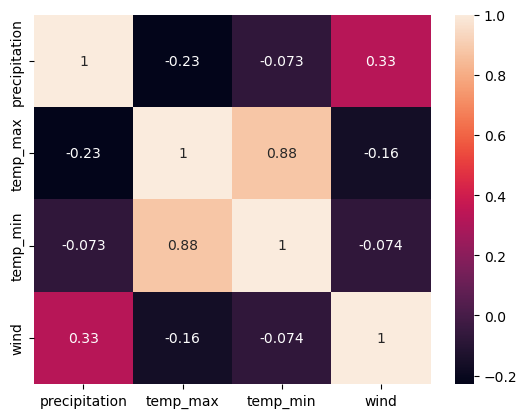

In [40]:
corr = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
sns.heatmap(corr, annot = True)